# MultiProcessing !!!!!!!!

![alt text](download.png)

- Ye hai aam zindagi - This is what happens usually, like in the give code.

In [ ]:
import time

start = time.time()

def do_something():
    print("Sleeping for 1 sec")
    time.sleep(1)
    print("Im up")

do_something()
do_something()

finish = time.time()

print(f"Slept for {round(finish-start, 2)} seconds")

Sleeping for a sec
Im up
Sleeping for a sec
Im up
Slept for 2.0 seconds


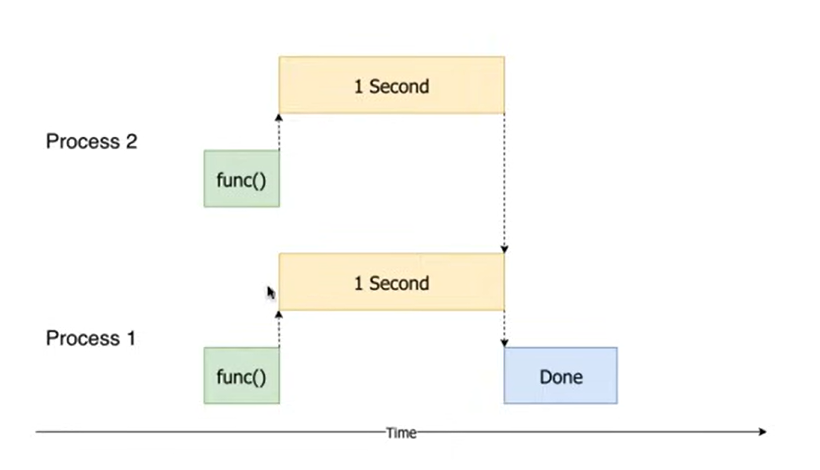

- Ye hai Mentos Zindagi. We use multiprocessing module where we make this thing work on multiple CPUs to make it faster with, as name suggests, MULTI-Processes.

> **IMPORTANT**: I/O bound tasks are made faster with MultiThreading, but it cant do much with CPU Bound tasks (crunching a lot of numbers on a CPU process) and hence we open more processes among CPU cores, to make it work faster.

In [9]:
# Run in MultiProcess.py file.
# EXACTLY LIKE WE DO IN MULTITHREAD.
import multiprocessing
import time

def do_something(sec):
    print(f"Sleeping for {sec} sec")
    time.sleep(1)
    print("I'm up")

if __name__ == "__main__":
    start = time.time()

    process = []
    # Total of 10 processes together just like Threading
    for _ in range(10):
        p = multiprocessing.Process(target=do_something, args=[1.5])
        p.start()
        process.append(p)
    
    # joining them to the main process just like Threading.
    for p in process:
        p.join()

    finish = time.time()
    print(f"Slept for {round(finish-start, 2)} seconds")

Slept for 0.3 seconds


In [ ]:
# Run in MultiProcess.py file.
# Using PoolExecutor to use multi processing
# SAME AS MULTITHREAD !
import concurrent.futures
import time

def do_something(sec: float) -> str:
    print(f"Sleeping for {sec} sec")
    time.sleep(sec)
    return "I'm up"

def main():
    start = time.time()

    with concurrent.futures.ProcessPoolExecutor() as executor:
        secs = [5,4,3,2,1]
        # processes = executor.map(do_something, secs) # Can do this too !
        processes = [executor.submit(do_something, sec) for sec in secs]
        for process in processes:
            print(process.result())

    finish = time.time()
    print(f"Slept for {round(finish - start, 2)} seconds")

if __name__ == "__main__":
    main()

In [17]:
# RUN THIS FIRST
import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()

# Takes 38 seconds on average !!!!
# for img_url in img_urls:
#     img_bytes = requests.get(img_url).content
#     img_name = img_url.split('/')[3]
#     img_name = f'./demo/{img_name}.jpg'
#     with open(img_name, 'wb') as img_file:
#         img_file.write(img_bytes)
#         print(f'{img_name} was downloaded...')

def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'./assets/{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

# ThreadPoolExtractor ! - Takes about 17-18 seconds
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

./assets/photo-1507143550189-fed454f93097.jpg was downloaded...
./assets/photo-1504198453319-5ce911bafcde.jpg was downloaded...
./assets/photo-1513938709626-033611b8cc03.jpg was downloaded...
./assets/photo-1541698444083-023c97d3f4b6.jpg was downloaded...
./assets/photo-1516117172878-fd2c41f4a759.jpg was downloaded...
./assets/photo-1524429656589-6633a470097c.jpg was downloaded...
./assets/photo-1522364723953-452d3431c267.jpg was downloaded...
./assets/photo-1532009324734-20a7a5813719.jpg was downloaded...
./assets/photo-1564135624576-c5c88640f235.jpg was downloaded...
./assets/photo-1550439062-609e1531270e.jpg was downloaded...
./assets/photo-1549692520-acc6669e2f0c.jpg was downloaded...
./assets/photo-1530224264768-7ff8c1789d79.jpg was downloaded...
./assets/photo-1516972810927-80185027ca84.jpg was downloaded...
./assets/photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
./assets/photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
Finished in 5.4122064000112005 seconds


In [ ]:
# RUN in MultiProcess.py
# We do some stuff on the images.
import time
import concurrent.futures
from PIL import Image, ImageFilter # Image manager library

img_names = [
    'photo-1516117172878-fd2c41f4a759.jpg',
    'photo-1532009324734-20a7a5813719.jpg',
    'photo-1524429656589-6633a470097c.jpg',
    'photo-1530224264768-7ff8c1789d79.jpg',
    'photo-1564135624576-c5c88640f235.jpg',
    'photo-1541698444083-023c97d3f4b6.jpg',
    'photo-1522364723953-452d3431c267.jpg',
    'photo-1513938709626-033611b8cc03.jpg',
    'photo-1507143550189-fed454f93097.jpg',
    'photo-1493976040374-85c8e12f0c0e.jpg',
    'photo-1504198453319-5ce911bafcde.jpg',
    'photo-1530122037265-a5f1f91d3b99.jpg',
    'photo-1516972810927-80185027ca84.jpg',
    'photo-1550439062-609e1531270e.jpg',
    'photo-1549692520-acc6669e2f0c.jpg'
]

t1 = time.time()

size = (1200, 1200)


def process_image(img_name):
    img = Image.open(img_name) # Opening

    img = img.filter(ImageFilter.GaussianBlur(15)) # Blurring

    img.thumbnail(size) # changin the thumbnail
    img.save(f'./assets/processed/{img_name}') # Saving new file
    print(f'{img_name} was processed...')


with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(process_image, img_names)


t2 = time.time()

print(f'Finished in {t2-t1} seconds')

Finished in 0.40564870834350586 seconds
